## 5. Model Optimization

In [2]:
# import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import array
from pickle import dump
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [3]:
# set random seed for numpy and tensorflow
np.random.seed(1234)
tf.random.set_seed(1234)

### 5.1 Load Sequences

In [4]:
# load doc into memory
def load_doc(filename):
    # open file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load file
in_filename = '../data/Text_Sequences_50_meta.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

### 5.2 Encode Sequences

In [5]:
# interger encode sequences of words

# instantiate Tokenizer
tokenizer = Tokenizer()
# updates internal vocabulary with each unique word in each line in lines
tokenizer.fit_on_texts(lines)  
# transform each text in lines to a sequence of integers
sequences = tokenizer.texts_to_sequences(lines)  

In [6]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

print('Vocabulary size is '+ str(vocab_size) + '.')

Vocabulary size is 2534.


### 5.3 Sequence Inputs & Output

#### Assign X and y variables

In [7]:
# separate into input and output

# convert list of lines in sequences to an array
sequences = array(sequences)
# X will contain the first 50 words (elements) in each line (dimension)
X = sequences[:,:-1]
# y will contain the last word (element) in each line (dimension) which will be used to train the predicted word
y = sequences[:,-1]

In [8]:
# seq_length will be the number of words (elements) in each line
seq_length = X.shape[1]
seq_length

50

In [9]:
# check shape of X
X.shape

(21296, 50)

In [10]:
# preview X variable
print(X)

[[  49  155   54 ...   46  884 2522]
 [ 155   54   16 ...  884 2522    1]
 [  54   16  109 ... 2522    1 1258]
 ...
 [ 192 1250    3 ...   44    3  887]
 [1250    3  185 ...    3  887   31]
 [   3  185   79 ...  887   31   18]]


X has 21296 dimensions (rows of sequences) and 50 elements (words).

In [11]:
# check shape of y
y.shape

(21296,)

In [12]:
# view output of y
print(y)
print(type(y))

[   1 1258    7 ...   31   18  888]
<class 'numpy.ndarray'>


In [13]:
# converts a class vector (integers) to binary class matrix where number of columns = vocab_size.
y = to_categorical(y, num_classes=vocab_size)

In [14]:
# check shape of y after converting to binary class matrix
y.shape

(21296, 2534)

From the shape of y, the array consists of 21296 rows (sequences) and 2534 features (vocabulary size).

In [15]:
# preview Y variable
print(y)
print(type(y))

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


### 5.4 Modelling

#### Define & Fit Model

In [16]:
# define the model function
# assign vocab_size to 2534 and seq_length to 50
def define_model():
    model = Sequential()
    model.add(Embedding(2534, 50, input_length=50))
    # the num of hidden neurons (units) is increased from 100 to 150
    # bidirectional LSTM is used to account for past and future inputs
    model.add(Bidirectional(LSTM(150, return_sequences = True)))
    # dropout is added to reduce overfitting
    model.add(Dropout(0.2))
    model.add(LSTM(150))
    model.add(Dropout(0.2))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(2534, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
# define model
model = define_model()              

In [18]:
# fit model and assign as history
# batch_size is reduced from 128 to 64
# num of epochs is increased from 100 to 150
history = model.fit(X, y, batch_size=64, epochs=150)

Epoch 1/150
333/333 [==============================] - 24s 44ms/step - loss: 6.1808 - accuracy: 0.0518
Epoch 2/150
333/333 [==============================] - 14s 42ms/step - loss: 5.7794 - accuracy: 0.0616
Epoch 3/150
333/333 [==============================] - 14s 42ms/step - loss: 5.6065 - accuracy: 0.0690
Epoch 4/150
333/333 [==============================] - 14s 42ms/step - loss: 5.4136 - accuracy: 0.0839
Epoch 5/150
333/333 [==============================] - 14s 42ms/step - loss: 5.2730 - accuracy: 0.0985
Epoch 6/150
333/333 [==============================] - 14s 42ms/step - loss: 5.1733 - accuracy: 0.1036
Epoch 7/150
333/333 [==============================] - 14s 42ms/step - loss: 5.0721 - accuracy: 0.1112
Epoch 8/150
333/333 [==============================] - 14s 42ms/step - loss: 4.9865 - accuracy: 0.1183
Epoch 9/150
333/333 [==============================] - 14s 42ms/step - loss: 4.9050 - accuracy: 0.1242
Epoch 10/150
333/333 [==============================] - 14s 42ms/step - l

#### Plot Accuracy & Loss Curve

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


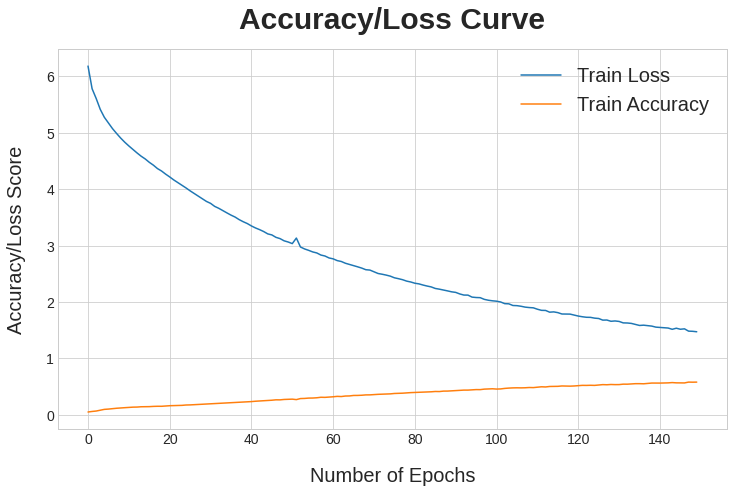

In [20]:
# plot train accuracy and loss curves

# figure size and plot style
plt.figure(figsize=(12,7)) 
plt.style.use('seaborn-whitegrid') 

# plot loss and accuracy curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend(fontsize=20);

# plot title
plt.title('Accuracy/Loss Curve', fontsize=30, pad=20, weight='bold')
# x-axis label
plt.xlabel('Number of Epochs', fontsize=20, labelpad=20)
# y-axis label
plt.ylabel('Accuracy/Loss Score', fontsize=20, labelpad=20)
# x-ticks
plt.xticks(fontsize=14)
# y-ticks
plt.yticks(fontsize=14)

plt.savefig('../data/Acc_Loss_Curve_Opt_Model.png')

- The optimized model shows a lower train loss score and higher accuracy score than the reference model. The train loss is score is 1.4735 and the accuracy score is 0.5815. In comparison, the reference model displayed a loss of 2.4078 and accuracy of 0.4073.

- There was a significant decrease in the loss function when the batch size was decreased from 128 to 64. This could be due to a higher number of iterations run in the optimized model due to a smaller batch size. 

- The use of bidirectional LSTM also increased the accuracy of the optimized model compared to the unidirectional LSTM.

- Increasing the number of epochs from 100 to 150 also increased the overall accuracy of the model.

- However, the accuracy and loss results are not sufficient to evaluate the models. We will analyze the BLEU and ROUGE scores of the various models to get a better observation of the model performance.

#### Model Summary

In [21]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            126700    
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 300)           241200    
_________________________________________________________________
dropout (Dropout)            (None, 50, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               270600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               22650     
_________________________________________________________________
dense_1 (Dense)              (None, 2534)              3

#### Model Plot

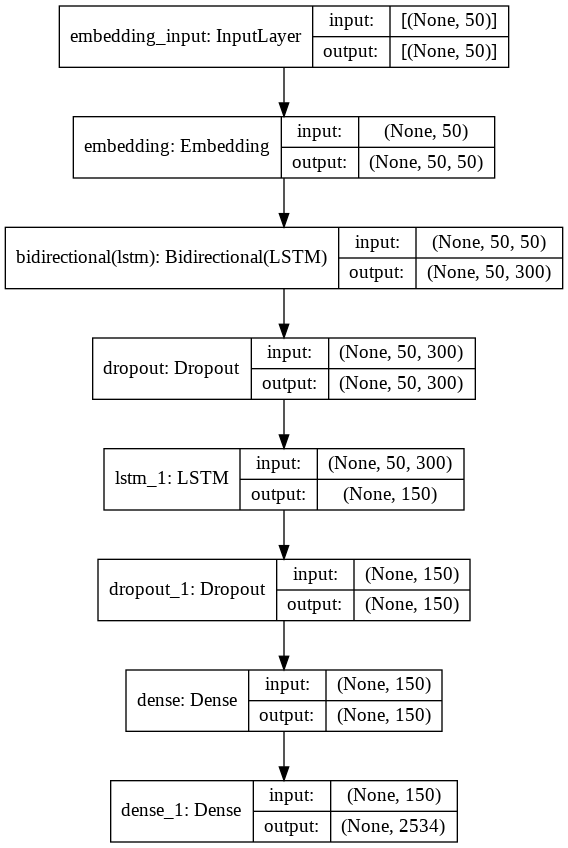

In [22]:
import pydot_ng as pydot

plot_model(model, show_shapes=True, to_file='../data/Model_Plot_Opt_Model.png')

#### Save Model

In [23]:
# save model to file
model.save('model_opt.h5')